# Multi-agent A* algorithm

In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

import itertools

import sys
sys.path.append('../')
                
from MAPF import MultiAgentAStar
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [5]:
# from queue import PriorityQueue

# def MultiAgentAStar(G, start_nodes,goal_nodes, labeled_goals = True, edge_weights = None):
    
#     '''
#         labeled_goals: A flag indicating whether the MAPF problem is labeled or not.
        
#             If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
#             Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
#     '''
    
#     assert(len(start_nodes)==len(goal_nodes))
    
#     def recover_path(final_st,cameFrom):
#         path = []
#         curr = final_st
#         while curr != start_nodes:
#             path.append(curr)
#             curr = cameFrom[curr]

#         path.append(start_nodes)
#         path.reverse()

#         return path

#     if edge_weights is None:
#         edge_weights = {e:1 for e in G.edges} # Assume uniform weights if None is given.

#     nx.set_edge_attributes(G,edge_weights,'weight')

#     OPEN = PriorityQueue()

#     gScore = {start_nodes:0} 

#     OPEN.put((0,start_nodes)) 
#     # Items in the priority queue are in the form (value, item), sorted by value. 
#     # The item with the smallest value is placed on top.

#     cameFrom = {}

#     while not OPEN.empty():
#         curr_g, curr_nodes = OPEN.get() # Remove the joint state with the smallest gScore.

#         if (curr_nodes == goal_nodes and labeled_goals) \
#            or (len(set(curr_nodes).difference(goal_nodes))==0 and not labeled_goals):
#             return recover_path(curr_nodes,cameFrom)


#         neighbors = [list(G[s]) for s in curr_nodes]

#         for joint_nb in itertools.product(*neighbors): # Iterate through all possible joint actions
#             traversed_edges = [tuple(set([s,sp])) for s,sp in zip(curr_nodes,joint_nb)]

#              # Check node and edge conflicts  
#             if len(joint_nb) == len(set(joint_nb))\
#               and len(traversed_edges)==len(set(traversed_edges)):

#                 if joint_nb not in gScore.keys():
#                     gScore[joint_nb] = np.inf

#                 travel_cost = np.sum([G.edges[(s,sp)]['weight'] for (s,sp) in zip(curr_nodes,joint_nb)])
#                 if curr_g + travel_cost < gScore[joint_nb]: # The A* update.
#                     cameFrom[joint_nb] = curr_nodes
#                     gScore[joint_nb] = curr_g + travel_cost
#                     OPEN.put((gScore[joint_nb],joint_nb))
                    
#     print('Multi-agent A* solution not found')
#     return None

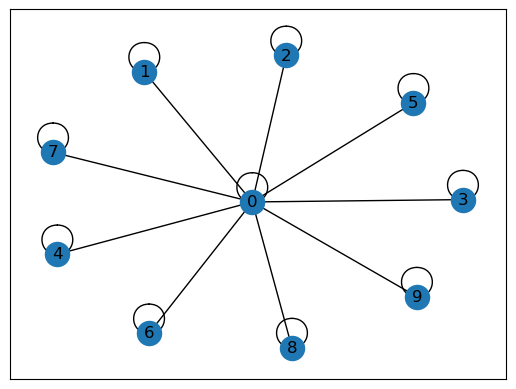

In [2]:
n_branch = 10
G = nx.Graph()
G.add_edge(0,0)
for i in range(1,n_branch):
    G.add_edge(i,i)
    G.add_edge(0,i)
nx.draw_networkx(G)

In [5]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([1,2]) # Must be hashable.

goal_nodes = tuple([5,4])


'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 

MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)


[(1, 2), (1, 0), (0, 4), (5, 4)]

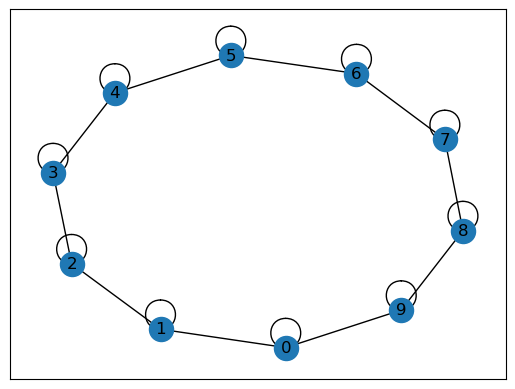

In [6]:
G = nx.circulant_graph(10,offsets = [0,1])
nx.draw_networkx(G)

In [10]:
# Basic components of the MAPF problem

G # The graph

start_nodes = tuple([0,1,2]) # Must be hashable.

goal_nodes = tuple([3,6,9]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 

MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)


[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 5),
 (0, 3, 6),
 (1, 4, 7),
 (2, 5, 8),
 (3, 6, 9)]

In [11]:
# The below should results in an infeasible problem, where the goal nodes of agent 0 and 2 block the path of agent 1.


G # The graph

start_nodes = tuple([0,1,2]) # Must be hashable.

goal_nodes = tuple([9,6,3]) 

'''
    If the problem is labeled, the goals are pre-assigned to the agents, meaning agent k must go to goal k. 
    Otherwise, the goals are not pre-assigned to the agents, meaning the problem is considered solved if all goals are occupied by the agents.
'''
labeled_goals = True 

MultiAgentAStar(G,start_nodes,goal_nodes,labeled_goals)


Multi-agent A* solution not found
